In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
# excluding outliers
data.drop(data[data['bedrooms']>11].index,inplace=True)
data.drop(data[(data['bedrooms']==0) | (data['bathrooms']==0)].index,inplace=True)
data.drop(data[(data['id']==125059179) | (data['id']==125059178)].index,inplace=True)

In [6]:
# data transformation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['month_day'] = pd.to_datetime(data['date']).dt.strftime('%m-%d')

In [4]:
#solving first question (which houses should be bought)
price_median_buy= data[['price', 'zipcode']].groupby('zipcode').median().reset_index()
price_median_buy.columns = ['zipcode', 'price_median_buy']
houses_to_buy = pd.merge(data,price_median_buy,on='zipcode',how='inner')

for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i, 'price']<houses_to_buy.loc[i,'price_median_buy']) & (houses_to_buy.loc[i,'condition']>=3):
        houses_to_buy.loc[i,'status'] = 'buy'
        
    else:
        houses_to_buy.loc[i,'status'] = 'do not buy'
        
first_column = houses_to_buy.pop('status')
houses_to_buy.insert(0,'status',first_column)

#st.dataframe(houses_to_buy)

#solving first question second part

for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i,'bedrooms'] >= 8) | (houses_to_buy.loc[i,'sqft_lot']>=1074218) | (houses_to_buy.loc[i,'bathrooms']>=4.25):
        houses_to_buy.loc[i,'recommendation_to_buy'] = 'very_high'
        
    elif (houses_to_buy.loc[i, 'floors'] >= 2) & (houses_to_buy.loc[i,'bedrooms']>=4) & (houses_to_buy.loc[i,'bedrooms']<=7) & (houses_to_buy.loc[i,'bathrooms']>=2) & (houses_to_buy.loc[i,'bathrooms']<=4):
        houses_to_buy.loc[i,'recommendation_to_buy'] = 'high'
        
    else:
        houses_to_buy.loc[i, 'recommendation_to_buy'] = 'regular'
        

for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i, 'month_day']>='03-01') & (houses_to_buy.loc[i,'month_day']<='05-31'):
        houses_to_buy.loc[i,'season'] = 'spring'
        
    elif (houses_to_buy.loc[i, 'month_day']>='06-01') & (houses_to_buy.loc[i,'month_day']<='08-31'):
        houses_to_buy.loc[i,'season'] = 'summer'
        
    elif (houses_to_buy.loc[i, 'month_day']>='09-01') & (houses_to_buy.loc[i,'month_day']<='11-30'):
        houses_to_buy.loc[i,'season'] = 'fall'
        
    else:
        houses_to_buy.loc[i,'season'] = 'winter'
        
#solving second question first part (for how much the houses should be sold) 
houses_buy_sell = houses_to_buy
houses_buy_sell = houses_buy_sell[houses_buy_sell.status == 'buy']
houses_buy_sell = houses_buy_sell.drop('status', axis=1)

first_column1 = houses_buy_sell.pop('recommendation_to_buy')
houses_buy_sell.insert(0,'recommendation_to_buy',first_column1)

price_median_sell= houses_buy_sell[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
price_median_sell.columns = ['zipcode', 'season', 'price_median_sell']
houses_buy_sell = pd.merge(houses_buy_sell,price_median_sell,how='inner')

for i in range(len(houses_buy_sell)):
    if (houses_buy_sell.loc[i, 'price']<houses_buy_sell.loc[i,'price_median_sell']) & (houses_buy_sell.loc[i,'recommendation_to_buy'] == 'regular'):
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.3)
        
    elif (houses_buy_sell.loc[i, 'price']<houses_buy_sell.loc[i,'price_median_sell']) & (houses_buy_sell.loc[i,'recommendation_to_buy'] == 'high'):
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.375)
        
    elif (houses_buy_sell.loc[i, 'price']<houses_buy_sell.loc[i,'price_median_sell']) & (houses_buy_sell.loc[i,'recommendation_to_buy'] == 'very_high'):
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.45)
        
    elif (houses_buy_sell.loc[i, 'price']>houses_buy_sell.loc[i,'price_median_sell']) & (houses_buy_sell.loc[i,'recommendation_to_buy'] == 'regular'):
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.10)
        
    elif (houses_buy_sell.loc[i, 'price']>houses_buy_sell.loc[i,'price_median_sell']) & (houses_buy_sell.loc[i,'recommendation_to_buy'] == 'high'):
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.125)
        
    else:
        houses_buy_sell.loc[i,'price_to_sell'] = houses_buy_sell.loc[i,'price'] + (houses_buy_sell.loc[i,'price'] * 0.15)
        
first_column2 = houses_buy_sell.pop('price_to_sell')
houses_buy_sell.insert(4,'price_to_sell',first_column2)    

#solving second question second part (when sell the houses)
for i in range(len(houses_buy_sell)):
        houses_buy_sell.loc[i,'profit'] = (houses_buy_sell.loc[i,'price_to_sell']) - (houses_buy_sell.loc[i,'price'])

first_column3 = houses_buy_sell.pop('profit')
houses_buy_sell.insert(5,'profit',first_column3)

for i in range(len(houses_buy_sell)):
    houses_buy_sell.loc[i,'profit_percentage_per_house'] = (((houses_buy_sell.loc[i,'price_to_sell']) - (houses_buy_sell.loc[i,'price'])) / houses_buy_sell.loc[i,'price']) * 100

first_column4 = houses_buy_sell.pop('profit_percentage_per_house')
houses_buy_sell.insert(6,'profit_percentage_per_house',first_column4)  

for i in range(len(houses_buy_sell)):
    houses_buy_sell.loc[i,'profit_percentage_total'] = ((houses_buy_sell.loc[i,'profit']) / (houses_buy_sell['profit'].sum())) * 100

first_column5 = houses_buy_sell.pop('profit_percentage_total')
houses_buy_sell.insert(7,'profit_percentage_total',first_column5)

time_to_sell= houses_buy_sell[['profit', 'profit_percentage_total', 'season']].groupby(['season']).sum().reset_index()
time_to_sell.columns = ['season', 'profit', 'profit_percentage_total']

df1 = houses_buy_sell[['profit', 'season','recommendation_to_buy','profit_percentage_total']].groupby(['season','recommendation_to_buy']).sum().reset_index()
df2 = houses_buy_sell[['id', 'season','recommendation_to_buy']].groupby(['season','recommendation_to_buy']).count().reset_index()
gen_ind_profit = pd.merge(df1,df2,how='inner')

for i in range(len(gen_ind_profit)):
    gen_ind_profit.loc[i,'profit_each_house'] = (gen_ind_profit.loc[i,'profit']) / (gen_ind_profit.loc[i,'id'])
gen_ind_profit.columns = ['season','recommendation_to_buy','total_profit','profit_percentage_total','num_of_houses','mean_profit_each_house']

#criar uma tabela com preco total de compra, total de profit e percentual de diferenca
total_price = houses_buy_sell['price'].sum()
total_profit = houses_buy_sell['profit'].sum()
total = pd.DataFrame([[total_price, total_profit]], columns=['total_price', 'total_profit'])
for i in range(len(total)):
    total.loc[i,'profit_percentage'] = ((total.loc[i,'total_profit']) / (total.loc[i,'total_price'])) * 100

#st.dataframe(houses_buy_sell)

#st.dataframe(time_to_sell)

#st.dataframe(total)

In [91]:
# casas very high nao tem vista para o mar
# casas very high tem bedrooms acima de 8, sqft_lot'>=1074218 e bathrooms acima de 8
v_high = houses_buy_sell[houses_buy_sell['recommendation_to_buy'] == 'very_high']
v_high

,recommendation_to_buy,id,date,price,price_to_sell,profit,profit_percentage_per_house,profit_percentage_total,bedrooms,bathrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_day,price_median_buy,season,price_median_sell
2914,very_high,1873400020,2014-07-03,340000.000,391000.000,51000.000,15.000,0.007,8,2.750,...,0,98133,47.757,-122.331,1760,7624,07-03,375000.000,summer,331750.000
3223,very_high,5451100490,2015-01-15,884900.000,1017635.000,132735.000,15.000,0.017,7,4.750,...,0,98040,47.538,-122.223,2310,10910,01-15,993750.000,winter,800000.000
3714,very_high,8141200080,2014-08-14,680000.000,782000.000,102000.000,15.000,0.013,8,2.750,...,0,98112,47.624,-122.305,1540,4800,08-14,915000.000,summer,680000.000
3790,very_high,125059138,2014-07-22,510000.000,739500.000,229500.000,45.000,0.030,6,4.500,...,0,98052,47.679,-122.104,2470,7561,07-22,615000.000,summer,516500.000
4194,very_high,2623069031,2014-05-21,542500.000,623875.000,81375.000,15.000,0.011,5,3.250,...,0,98027,47.456,-122.004,2450,68825,05-21,570500.000,spring,460000.000
5605,very_high,8812401450,2014-12-29,660000.000,759000.000,99000.000,15.000,0.013,10,3.000,...,0,98105,47.663,-122.320,1810,3745,12-29,675000.000,winter,570000.000
6113,very_high,7418000130,2014-12-11,430000.000,494500.000,64500.000,15.000,0.008,8,3.250,...,0,98059,47.479,-122.131,1780,10457,12-11,435000.000,winter,320000.000
6355,very_high,9126101740,2014-12-04,490000.000,563500.000,73500.000,15.000,0.010,8,5.000,...,0,98122,47.609,-122.303,1800,2580,12-04,572000.000,winter,450000.000
6646,very_high,2025059131,2014-09-04,980000.000,1127000.000,147000.000,15.000,0.019,4,4.250,...,2001,98004,47.632,-122.203,1800,9000,09-04,1150000.000,fall,823000.000
6662,very_high,644200040,2014-05-15,1000000.000,1150000.000,150000.000,15.000,0.019,5,4.250,...,0,98004,47.587,-122.192,2540,12131,05-15,1150000.000,spring,865000.000


In [92]:
#casas com recomendacao high tem 'floors'>= 2, bedrooms entre 4 e 7 e bathrooms' entre 2 e 4

# casas com recomendacao high e condicao acima de 3, casas high nao tem vista para o mar
high = houses_buy_sell[(houses_buy_sell['recommendation_to_buy'] == 'high') & (houses_buy_sell['condition'] > 3)]
high

,recommendation_to_buy,id,date,price,price_to_sell,profit,profit_percentage_per_house,profit_percentage_total,bedrooms,bathrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_day,price_median_buy,season,price_median_sell
334,high,3816300105,2015-01-12,435000.000,489375.000,54375.000,12.500,0.007,4,2.500,...,0,98028,47.764,-122.262,1760,9876,01-12,445000.000,winter,360250.000
707,high,8644400040,2014-07-29,605000.000,680625.000,75625.000,12.500,0.010,4,2.250,...,0,98074,47.615,-122.054,2510,39221,07-29,642000.000,summer,531250.000
785,high,7715801030,2015-03-31,510000.000,701250.000,191250.000,37.500,0.025,4,2.500,...,0,98074,47.626,-122.059,1480,8120,03-31,642000.000,spring,543100.000
969,high,7511200190,2014-09-10,580000.000,652500.000,72500.000,12.500,0.009,4,2.250,...,0,98053,47.656,-122.042,2390,41454,09-10,635000.000,fall,475000.000
1478,high,2215900410,2015-05-08,323000.000,363375.000,40375.000,12.500,0.005,4,2.750,...,0,98038,47.351,-122.058,1690,7735,05-08,342000.000,spring,289000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,high,1775800280,2015-02-26,310000.000,426250.000,116250.000,37.500,0.015,5,2.000,...,0,98072,47.741,-122.095,1260,12398,02-26,515000.000,winter,422800.000
10231,high,126059018,2015-01-08,395000.000,543125.000,148125.000,37.500,0.019,4,2.250,...,0,98072,47.762,-122.110,2070,37680,01-08,515000.000,winter,422800.000
10256,high,9238500100,2015-03-18,495000.000,556875.000,61875.000,12.500,0.008,4,2.250,...,0,98072,47.774,-122.134,2190,21560,03-18,515000.000,spring,425000.000
10548,high,3262300235,2014-11-26,1555000.000,1749375.000,194375.000,12.500,0.025,5,2.500,...,0,98039,47.631,-122.238,2870,16238,11-26,1892500.000,fall,1355000.000


In [93]:
# casas com recomendacao regular, condicao igual a 5, quartos acima de 3, banheiros maior ou igual a 2.
# Tabem inclui algumas casas que nao estao dentro das caracteristicas acima, porem estao de frente para o mar.
reg = houses_buy_sell.iloc[:,:14][(houses_buy_sell['recommendation_to_buy'] == 'regular') & 
                                             (houses_buy_sell['condition'] == 5) & (houses_buy_sell['bedrooms'] >= 4) & 
                                             (houses_buy_sell['bathrooms'] >= 2) | (houses_buy_sell['waterfront'] == 1)]

reg

,recommendation_to_buy,id,date,price,price_to_sell,profit,profit_percentage_per_house,profit_percentage_total,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
20,regular,4279900140,2014-10-01,251000.000,276100.000,25100.000,10.000,0.003,4,2.000,1650,5974,1.000,0
80,regular,185000118,2015-02-23,212000.000,275600.000,63600.000,30.000,0.008,4,2.000,1880,7500,1.000,0
1317,regular,7907600100,2015-04-21,287500.000,316250.000,28750.000,10.000,0.004,4,2.000,1220,9147,1.000,0
1572,regular,1545806720,2014-08-26,254950.000,331435.000,76485.000,30.000,0.010,4,2.000,2180,8800,1.000,0
1816,regular,5282200015,2014-05-27,525000.000,577500.000,52500.000,10.000,0.007,5,3.000,2750,3800,1.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,regular,2212200100,2014-10-22,229950.000,298935.000,68985.000,30.000,0.009,4,2.500,2150,7670,1.000,0
9949,regular,3110800260,2014-07-15,274700.000,302170.000,27470.000,10.000,0.004,4,2.000,2440,9600,1.000,0
10274,regular,1775801090,2014-05-30,465000.000,511500.000,46500.000,10.000,0.006,4,2.250,1820,20349,1.000,0
10339,regular,7148200040,2015-02-10,173000.000,224900.000,51900.000,30.000,0.007,4,2.000,1200,8460,1.000,0


In [94]:
rec1 = high.append(reg)
rec2 = rec1.append(v_high)

In [96]:
rec2

,recommendation_to_buy,id,date,price,price_to_sell,profit,profit_percentage_per_house,profit_percentage_total,bedrooms,bathrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_day,price_median_buy,season,price_median_sell
334,high,3816300105,2015-01-12,435000.000,489375.000,54375.000,12.500,0.007,4,2.500,...,0.000,98028.000,47.764,-122.262,1760.000,9876.000,01-12,445000.000,winter,360250.000
707,high,8644400040,2014-07-29,605000.000,680625.000,75625.000,12.500,0.010,4,2.250,...,0.000,98074.000,47.615,-122.054,2510.000,39221.000,07-29,642000.000,summer,531250.000
785,high,7715801030,2015-03-31,510000.000,701250.000,191250.000,37.500,0.025,4,2.500,...,0.000,98074.000,47.626,-122.059,1480.000,8120.000,03-31,642000.000,spring,543100.000
969,high,7511200190,2014-09-10,580000.000,652500.000,72500.000,12.500,0.009,4,2.250,...,0.000,98053.000,47.656,-122.042,2390.000,41454.000,09-10,635000.000,fall,475000.000
1478,high,2215900410,2015-05-08,323000.000,363375.000,40375.000,12.500,0.005,4,2.750,...,0.000,98038.000,47.351,-122.058,1690.000,7735.000,05-08,342000.000,spring,289000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,very_high,7214700830,2014-05-13,480000.000,696000.000,216000.000,45.000,0.028,5,4.750,...,0.000,98077.000,47.760,-122.079,2750.000,36150.000,05-13,652475.000,spring,535000.000
8988,very_high,2205700470,2015-01-22,650500.000,748075.000,97575.000,15.000,0.013,5,4.250,...,2005.000,98006.000,47.577,-122.151,1400.000,9750.000,01-22,760184.500,winter,590000.000
9037,very_high,5566100170,2014-10-29,650000.000,747500.000,97500.000,15.000,0.013,10,2.000,...,0.000,98006.000,47.571,-122.175,2040.000,11914.000,10-29,760184.500,fall,576250.000
9390,very_high,3886901795,2015-04-22,655000.000,753250.000,98250.000,15.000,0.013,6,5.000,...,0.000,98033.000,47.681,-122.187,1870.000,9900.000,04-22,678350.000,spring,550000.000


In [7]:
time_to_sell

,season,profit,profit_percentage_total
0,fall,190175214.750,24.641
1,spring,218895527.025,28.363
2,summer,232709588.525,30.153
3,winter,129992037.750,16.843


In [8]:
gen_ind_profit

,season,recommendation_to_buy,total_profit,profit_percentage_total,num_of_houses,mean_profit_each_house
0,fall,high,14103840.250,1.827,182,77493.628
1,fall,regular,175774374.500,22.775,2440,72038.678
2,fall,very_high,297000.000,0.038,3,99000.000
3,spring,high,16598089.375,2.151,190,87358.365
4,spring,regular,201670812.650,26.131,2759,73095.619
5,spring,very_high,626625.000,0.081,5,125325.000
6,summer,high,19831292.225,2.570,251,79009.132
7,summer,regular,212323596.300,27.511,2896,73316.159
8,summer,very_high,554700.000,0.072,4,138675.000
9,winter,high,9592907.250,1.243,132,72673.540


In [9]:
total

,total_price,total_profit,profit_percentage
0,4092425058.000,771772368.050,18.859


   waterfront       price
0           0  531669.855
1           1 1661876.025
False: Houses with water view are 212.57668803323867 percent more expensives


<BarContainer object of 2 artists>

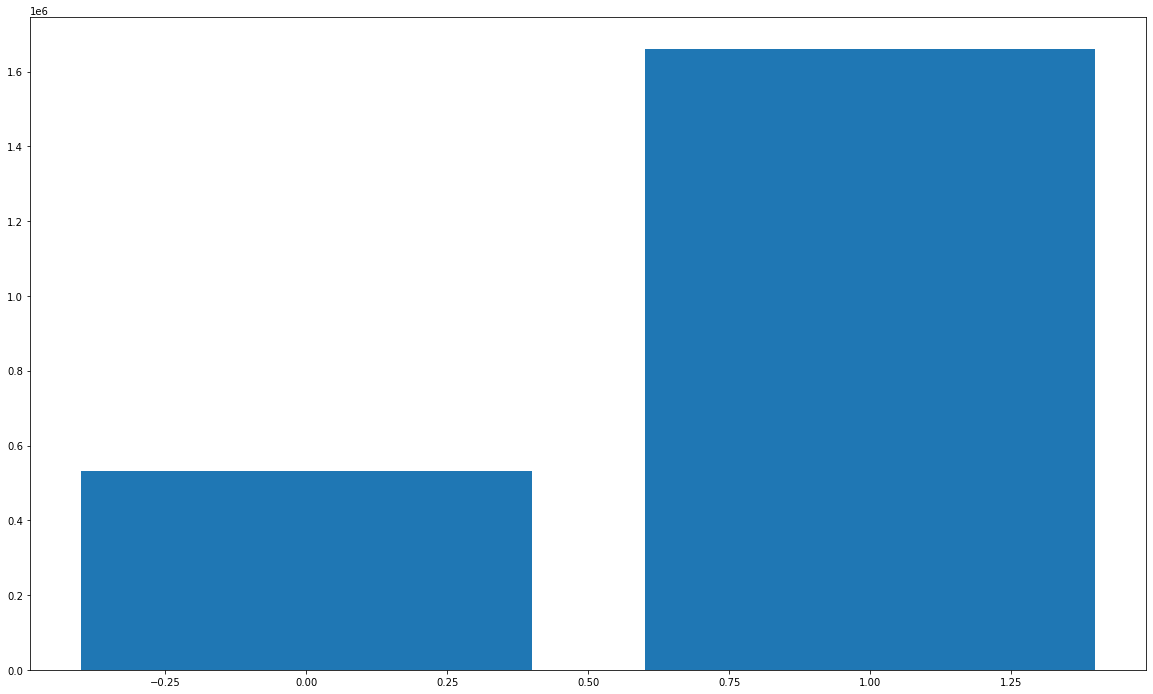

In [9]:
# Hypothesis 01: Houses with water view are 20% more expensive, on the average.
h1 = houses_to_buy[['price','waterfront']].groupby('waterfront').mean().reset_index()

#(produto mais caro - produto mais barato)  / produto mais barato * 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)
h1_answer = ((h1.loc[1, 'price']) - (h1.loc[0, 'price'])) / (h1.loc[0, 'price']) *100

print(h1)
print('False: Houses with water view are {} percent more expensives'.format(h1_answer))
plt.figure(figsize=(20,12))
plt.bar(h1['waterfront'], h1['price'])

In [10]:
h1.dtypes

waterfront      int64
price         float64
dtype: object

  yr_built_1955  mean_price
0         after  541398.938
1        before  537199.195
False: Houses that was built before 1955 are -0.7757205525248732 percent cheaper


<BarContainer object of 2 artists>

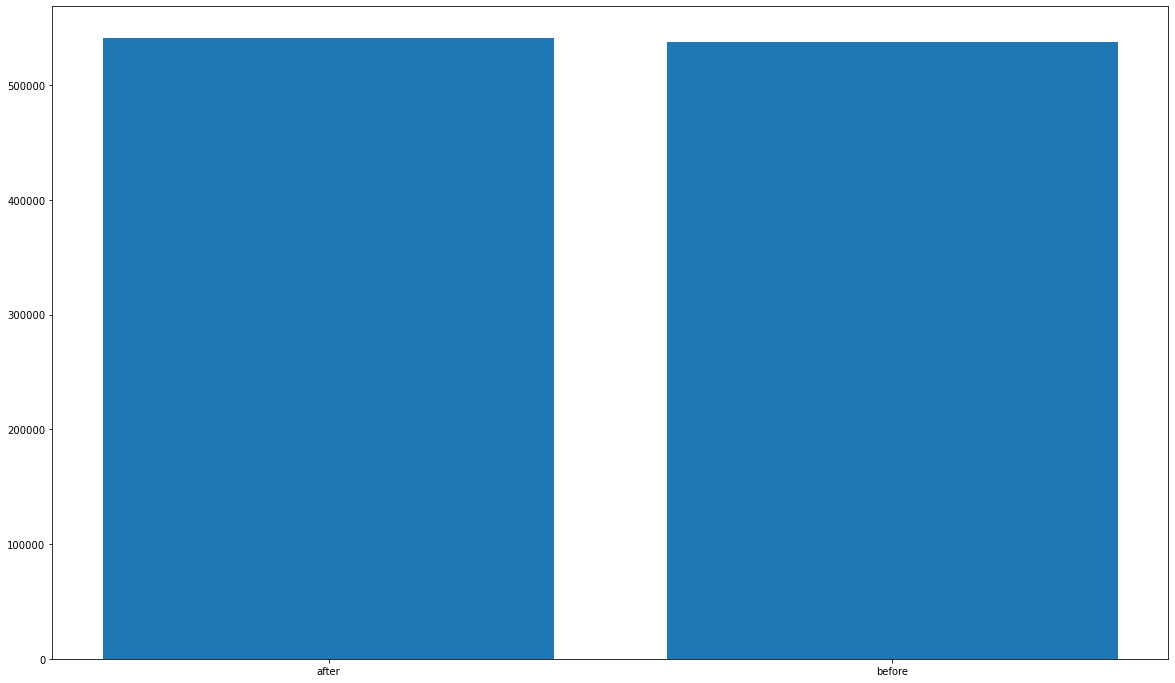

In [7]:
# Hypothesis 02: Houses that was built before 1955 are 50% cheaper, on the average.
for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i,'yr_built']>=1955):
        houses_to_buy.loc[i,'yr_built_1955'] = 'after'
        
    else:
        houses_to_buy.loc[i,'yr_built_1955'] = 'before'
        
h2 = houses_to_buy[['price','yr_built_1955']].groupby('yr_built_1955').mean().reset_index()

h2.columns = ['yr_built_1955', 'mean_price']   
    
#(produto mais barato - produto mais caro)  / produto mais caro * 100
h2_answer = ((h2.loc[1, 'mean_price']) - (h2.loc[0, 'mean_price'])) / (h2.loc[0, 'mean_price']) *100

print(h2)
print('False: Houses that was built before 1955 are {} percent cheaper'.format(h2_answer))
plt.figure(figsize=(20,12))
plt.bar(h2['yr_built_1955'], h2['mean_price'])

  basement  sqft_lot
0       No 16274.524
1      Yes 13287.154
False: Houses without basement are 22.483151526642544 percent bigger them houses with basement


<BarContainer object of 2 artists>

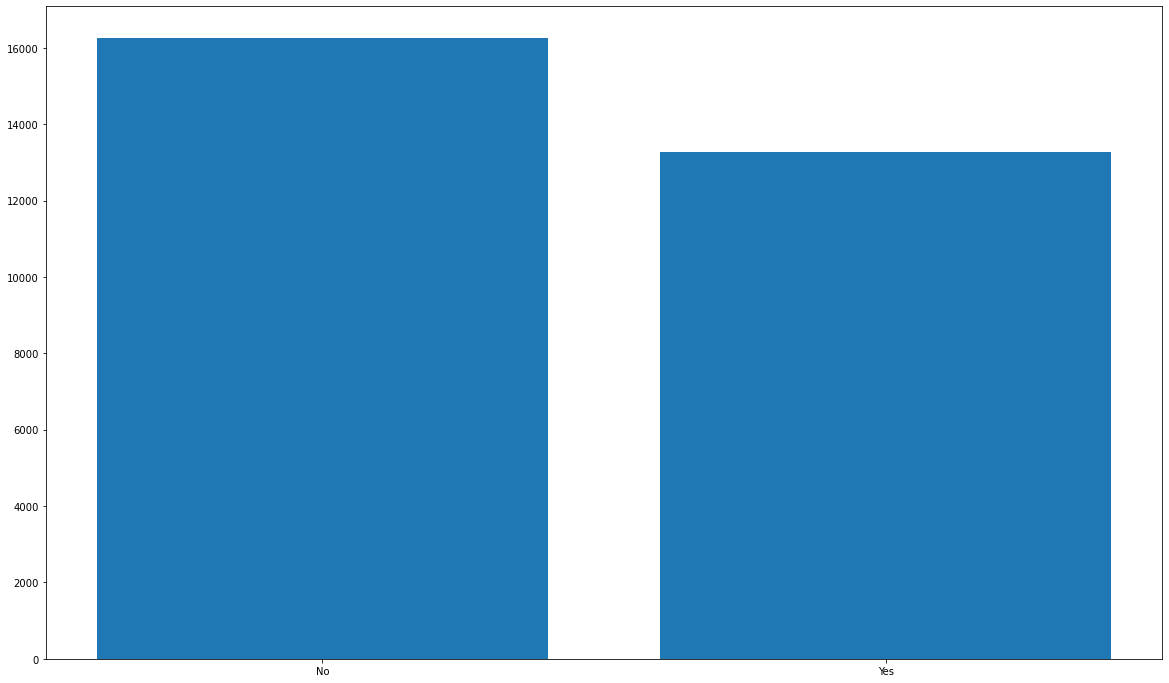

In [9]:
# Hypothesis 03: Houses without basement are 40% bigger them house with basement, related to total area (sqft_lot), on average.
for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i,'sqft_basement']==0):
        houses_to_buy.loc[i,'basement'] = 'No'
        
    else:
        houses_to_buy.loc[i,'basement'] = 'Yes'
        
h3 = houses_to_buy[['sqft_lot','basement']].groupby('basement').mean().reset_index()

#(produto maior - produto menor)  / produto menor  * 100
h3_answer = ((h3.loc[0, 'sqft_lot']) - (h3.loc[1, 'sqft_lot'])) / (h3.loc[1, 'sqft_lot']) *100
        
print(h3)
print('False: Houses without basement are {} percent bigger them houses with basement'.format(h3_answer))
plt.figure(figsize=(20,12))
plt.bar(h3['basement'], h3['sqft_lot'])

  year_month  sum_of_price
0    2014-05 969005929.000
1    2015-05 360549920.000
False: The total houses price YoY (Year over Year) suffered a decrease of -62.79177358882806 percent


<BarContainer object of 2 artists>

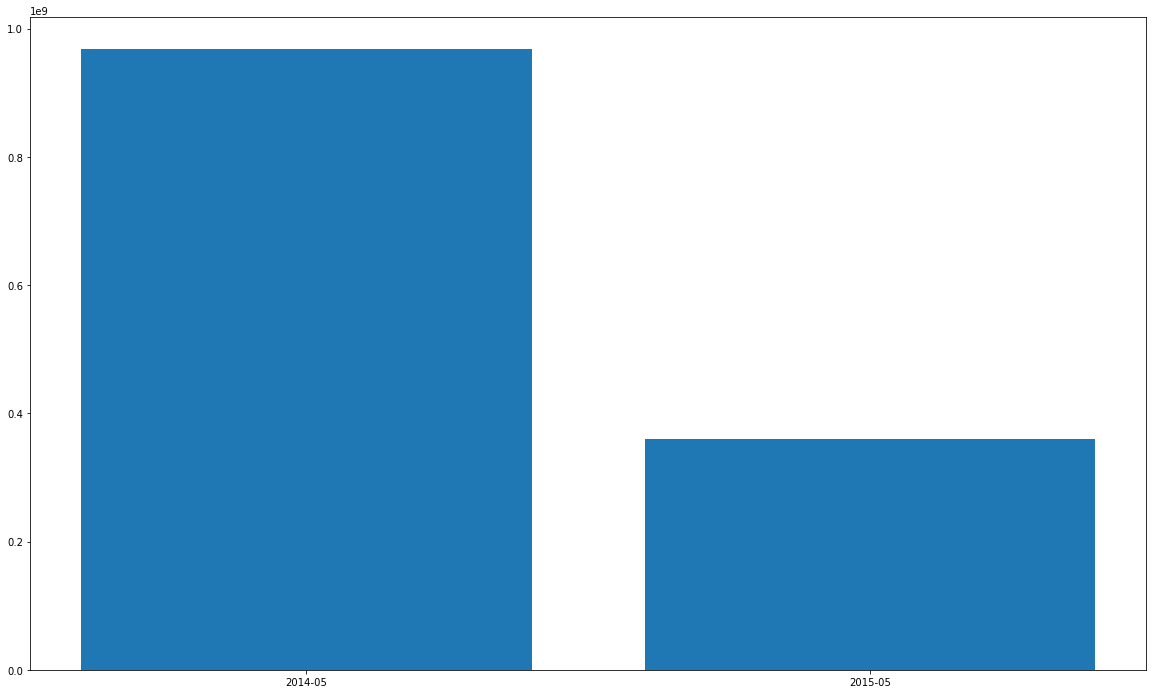

In [10]:
# Hypothesis 04: The increase of houses price YoY (Year over Year) is 10%, in general.
# (Houses price of may 2014 compared to Houses price of may 2015)
# COMPOUND ANNUAL GROWTH RATES (CAGR)
houses_to_buy['year_month'] = pd.to_datetime(houses_to_buy['date']).dt.strftime('%Y-%m')

df = houses_to_buy[(houses_to_buy['year_month']=='2014-05') | (houses_to_buy['year_month']=='2015-05')]

h4 = df[['price','year_month']].groupby('year_month').sum().reset_index()

h4.columns = ['year_month', 'sum_of_price']   

# taxa de crescimento mensal simple, mes por mes   
#(esse ano - ano passado) / ano passado
h4_answer = ((h4.loc[1, 'sum_of_price']) - (h4.loc[0, 'sum_of_price'])) / (h4.loc[0, 'sum_of_price']) *100

print(h4)
print('False: The total houses price YoY (Year over Year) suffered a decrease of {} percent'.format(h4_answer)) 
plt.figure(figsize=(20,12))
plt.bar(h4['year_month'], h4['sum_of_price'])

   year_month  sum_of_price  MoM_percentage
0     2014-05  48305650.000             nan
1     2014-06  60454490.000          25.150
2     2014-07  51898353.000         -14.153
3     2014-08  47204900.000          -9.044
4     2014-09  45812529.000          -2.950
5     2014-10  42604519.000          -7.002
6     2014-11  29236150.000         -31.378
7     2014-12  34960377.000          19.579
8     2015-01  27589850.000         -21.083
9     2015-02  31352149.000          13.637
10    2015-03  39961745.000          27.461
11    2015-04  60328919.000          50.967
12    2015-05  13727039.000         -77.246
False: The total houses price MoM (month over Month) suffered a decrease of -9.953899240174858 percent


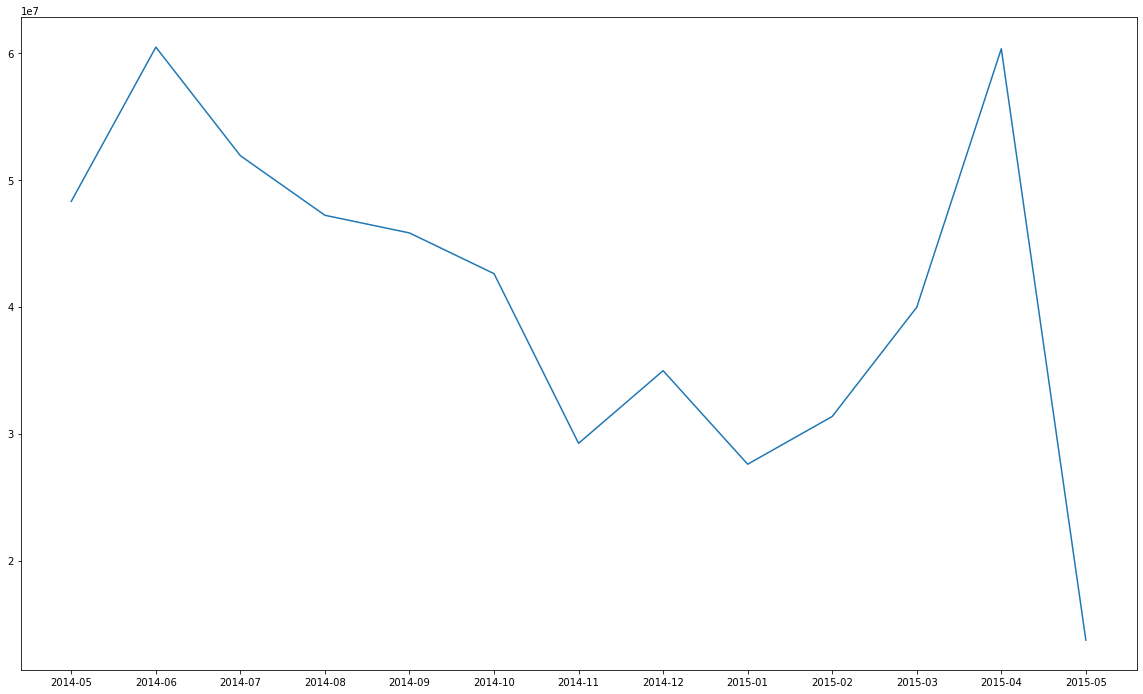

In [66]:
# Hypothesis 05: Houses with 3 bathrooms have a increase MoM (month over Month) of 15%, in general.
# (comparison of all Houses price of all months)
# Compound Monthly Growth Rates (CMGR)
df1 = houses_to_buy[(houses_to_buy['bathrooms']==3)]

h5 = df1[['price','year_month']].groupby('year_month').sum().reset_index()

h5.columns = ['year_month', 'sum_of_price']   

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
h5['MoM_percentage'] = ((h5['sum_of_price'] - h5['sum_of_price'].shift(1)) / h5['sum_of_price'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
#(last/first)**(1/periods)-1
cmgr = (((h5.loc[12, 'sum_of_price']) / (h5.loc[0, 'sum_of_price'])) ** (1 / (h5['sum_of_price'].count() - 1)) - 1) * 100

print(h5)
print('False: The total houses price MoM (month over Month) suffered a decrease of {} percent'.format(cmgr))
plt.figure(figsize=(20,12))
plt.plot(h5['year_month'], h5['sum_of_price'])

   bedrooms_level  bathrooms  percentage
0           1.000      2.044      94.487
1           2.000      2.840      39.951
2           3.000      3.975       0.000
True: Houses with number of bedrooms above 8 have a number of bathrooms 39.9514563106796 percent higher than houses with number of bedrooms between 5 and 8, and 94.48676155875182 higuer than houses with number of bedrooms between 1 and 4.


<BarContainer object of 3 artists>

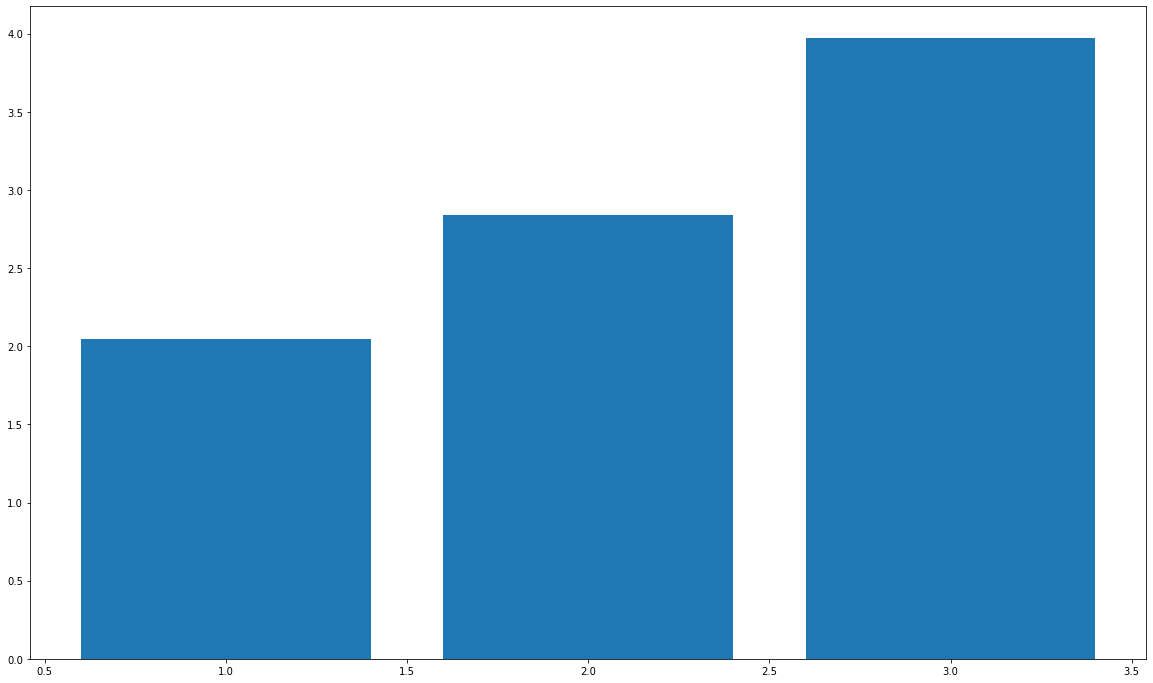

In [102]:
# Hypothesis 06: Houses with number of bedrooms above 8 have a number of bathrooms 40% higher than houses with number 
# of bedrooms between 5 and 8, and 94% higuer than houses with number of bedrooms between 1 and, 4 on average.

for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i,'bedrooms'] > 8):
        houses_to_buy.loc[i,'bedrooms_level'] = 3
        
    elif (houses_to_buy.loc[i,'bedrooms'] >= 5) & (houses_to_buy.loc[i,'bedrooms'] <= 8):
        houses_to_buy.loc[i,'bedrooms_level'] = 2
        
    else:
        houses_to_buy.loc[i,'bedrooms_level'] = 1
        
h6 = houses_to_buy[['bathrooms','bedrooms_level']].groupby('bedrooms_level').mean().reset_index()

#(produto maior - produto menor)  / produto menor  * 100
for i in range(len(h6)):
    h6.loc[i,'percentage'] = ((h6.loc[2,'bathrooms'] - h6.loc[i,'bathrooms']) / h6.loc[i,'bathrooms']) * 100

print(h6)
print('True: Houses with number of bedrooms above 8 have a number of bathrooms {} percent higher than houses with number of bedrooms between 5 and 8, and {} higuer than houses with number of bedrooms between 1 and 4.'.format(h6.iloc[1,2],h6.iloc[0,2])) 
plt.figure(figsize=(20,12))
plt.bar(h6['bedrooms_level'], h6['bathrooms'])

In [101]:
h6.iloc[1,2]

39.9514563106796

    bedrooms  sqft_lot  percentage
0          1 16070.036      29.686
1          2 12096.726      72.283
2          3 14414.790      44.578
3          4 16720.793      24.639
4          5 16769.022      24.280
5          6 18670.241      11.624
6          7 20840.553       0.000
7          8  8971.615     132.294
8          9  5480.000     280.302
9         10  8859.667     135.230
10        11  4960.000     320.172
True: Houses with 7 bedrooms hsa the total area (sqft_lot) bigger between 132.29431644290653 and 320.17243208828523 percent than houses with 8 to 11 bedrooms.


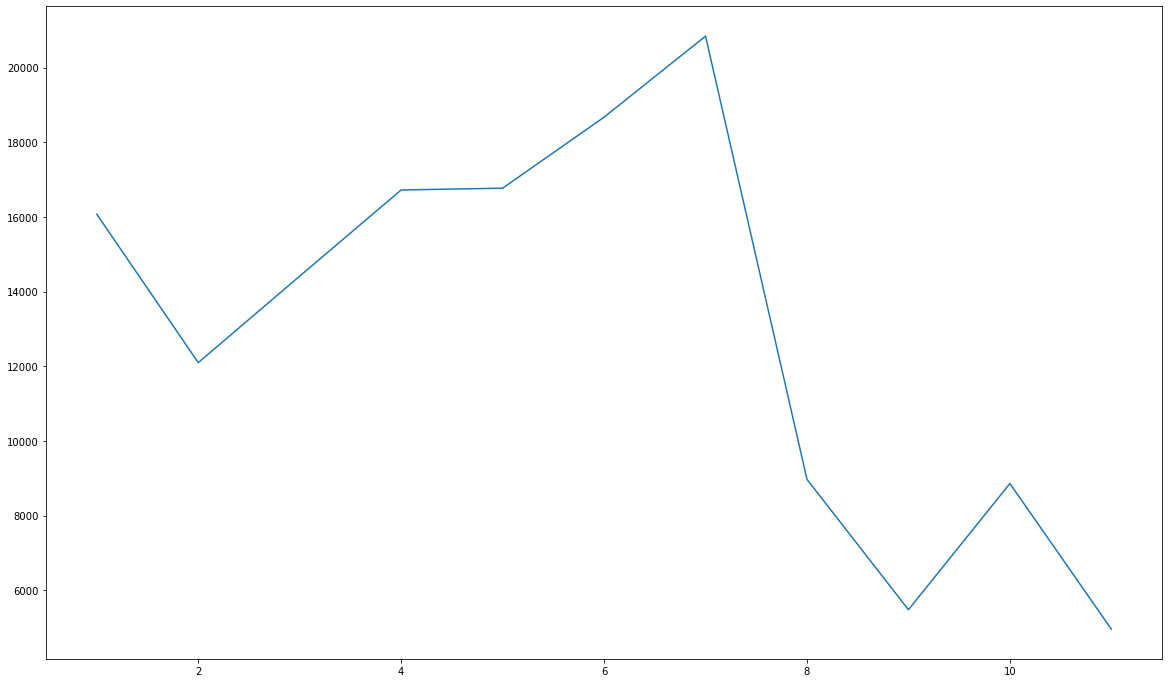

In [96]:
# Hypothesis 07: Houses with 7 bedrooms has the total area (sqft_lot) bigger between 132 to 320 percent than houses with 8 to 11 bedrooms, on average.
h7 = houses_to_buy[['bedrooms','sqft_lot']].groupby('bedrooms').mean().reset_index()

#(produto maior - produto menor)  / produto menor  * 100
for i in range(len(h7)):
    h7.loc[i,'percentage'] = ((h7.loc[6,'sqft_lot'] - h7.loc[i,'sqft_lot']) / h7.loc[i,'sqft_lot']) * 100

print(h7)
print('True: Houses with 7 bedrooms hsa the total area (sqft_lot) bigger between {} and {} percent than houses with 8 to 11 bedrooms.'.format(h7.iloc[7,2],h7.iloc[10,2])) 
plt.figure(figsize=(20,12))
plt.plot(h7['bedrooms'], h7['sqft_lot'])

  renovated  sqft_living
0        No     2069.602
1       Yes     2320.694
True: Renovated Houses have livingrooms 12.132344286788795 percent bigger them house not renovated, on average.


<BarContainer object of 2 artists>

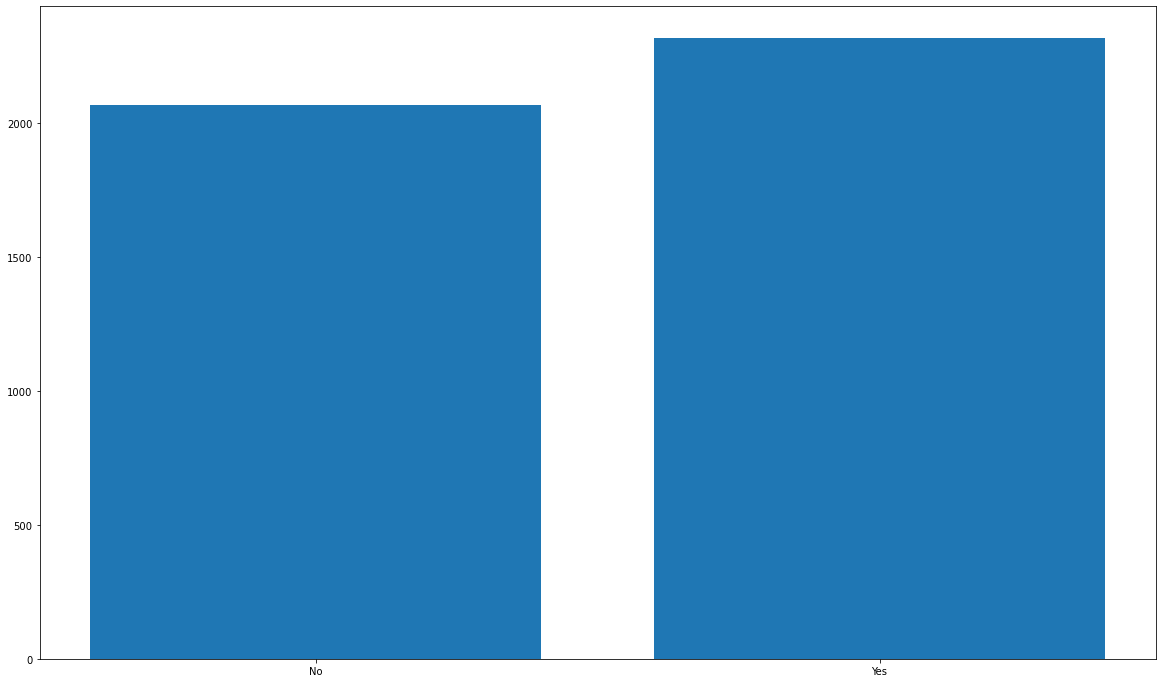

In [84]:
# Hypothesis 08:  Renovated Houses have livingrooms 12% bigger them house not renovated, on average.
for i in range(len(houses_to_buy)):
    if (houses_to_buy.loc[i,'yr_renovated']==0):
        houses_to_buy.loc[i,'renovated'] = 'No'
        
    else:
        houses_to_buy.loc[i,'renovated'] = 'Yes'
        
h8 = houses_to_buy[['sqft_living','renovated']].groupby('renovated').mean().reset_index()
h8

#(produto maior - produto menor)  / produto menor  * 100
h8_answer = ((h8.loc[1, 'sqft_living']) - (h8.loc[0, 'sqft_living'])) / (h8.loc[0, 'sqft_living']) *100
        
print(h8)
print('True: Renovated Houses have livingrooms {} percent bigger them house not renovated, on average.'.format(h8_answer))
plt.figure(figsize=(20,12))
plt.bar(h8['renovated'], h8['sqft_living'])

In [168]:
dfh1 = houses_to_buy[['waterfront', 'price']]
for i in range(len(dfh1)):
        if (dfh1.loc[i, 'waterfront'] == 1):
            dfh1.loc[i, 'water_view'] = 'yes'
    
        else:
            dfh1.loc[i, 'water_view'] = 'no'
dfh1

,waterfront,price,water_view
0,0,221900.000,no
1,0,205425.000,no
2,0,445000.000,no
3,0,236000.000,no
4,0,170000.000,no
...,...,...,...
21589,0,2720000.000,no
21590,0,1950000.000,no
21591,0,2250000.000,no
21592,0,2900000.000,no


In [ ]:
### USAR O DROP SO PARA COLUNAS, NUNCA USAR PARA LINHAS, DA ERRO AO CRIAR LACO FOR, PRA REMOVER LINHAS SO USAR O METODO DE 
#SELECIONAR A COLUNA COM AS LINHAS ESPECIFICAS.

## evitar usar apply tbm